In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rc

In [19]:
def get_data_list(metric,day,data_source,data_df):
    directory = 'outputs'
    for f in os.listdir(directory):
        if metric in f and day in f and data_source in f:
            df = pd.read_csv(directory+'/'+f,index_col=0)
            
            df = pd.DataFrame(np.abs(df.values),columns=df.columns if len(df.columns)>2 else [metric])
            if len(df.columns)<2 and 'TRM' in df.columns:
                print('error')
            graph_n = f.replace(metric+'_'+day,'').replace(data_source+'.csv','')
            if graph_n in data_df[data_df.source == data_source].graph.values:
                start_ind = list((data_df.source == data_source) & (data_df.graph == graph_n)).index(True)
                if df.shape[1]>1:
                    for i in range(df.shape[1]):
                        for j in range(df.shape[0]):
                            data_df.iloc[start_ind+j,i+int(metric=='runtimes')*df.shape[1]] = df.iloc[j,i]
                else:
                    for j in range(df.shape[0]):
                        data_df.iloc[start_ind+j,list(data_df.columns).index(metric)] = df.iloc[j,0]
            else:
                df['graph'] = [graph_n]*df.shape[0]
                df['source'] = [data_source]*df.shape[0]
                df['ratios'] = df.index
                df['day'] = [day]*df.shape[0]
                if df.shape[1]>6:
                    
                    df.columns = [col for col in data_df.columns if metric in col]+['graph','source','day']
                    for col in data_df.columns:
                        if not (col in df.columns):
                            df[col] = [np.nan]*df.shape[1]
                data_df = data_df.append(df,ignore_index=True)
    return data_df


In [22]:
sources = ['citi','capital','blue']
#score_cols = ['TRM_scores','Local Ratio_scores', 'HS_scores', 'GHS_scores', 'IHS_scores']
#rt_cols = ['TRM_runtimes','Local Ratio_runtimes', 'HS_runtimes',  'GHS_runtimes', 'IHS_runtimes']
score_cols = ['TRM_scores', 'HS_scores', 'IHS_scores']
rt_cols = ['TRM_runtimes', 'HS_runtimes', 'IHS_runtimes']
ratios = [1/5, 1/4, 1/3, 1/2, 1, 2, 3, 4, 5]


df = pd.DataFrame(columns=score_cols+ rt_cols+['graph','graphs','sdists','source'],)
for metric in ['sdists','graphs','runtimes','scores']:
    for day in ['weekend','weekday']:
        for source in sources:
            df=get_data_list(metric,day,source,df)
for col in score_cols+rt_cols:
    df[col]=pd.to_numeric(df[col])
df

,TRM_scores,HS_scores,IHS_scores,TRM_runtimes,HS_runtimes,IHS_runtimes,graph,graphs,sdists,source,ratios,day
0,19480.644436,19371.383517,18996.464569,0.030928,0.206370,0.087564,3,63,18996.464569,citi,0.0,weekend
1,26104.030609,22900.630927,22900.630927,0.027345,0.114319,0.101613,3,64,22900.630927,citi,1.0,weekend
2,38203.522168,37235.114516,34981.111124,0.030445,0.153196,0.145866,3,65,34388.851770,citi,2.0,weekend
3,44234.488445,42218.379268,42584.612682,0.036989,0.199507,0.193545,3,71,41425.250240,citi,3.0,weekend
4,128349.566671,124568.652850,124441.044418,0.055827,0.561962,0.506439,3,84,91186.083051,citi,4.0,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...
319,142181.396568,136907.512666,135609.560110,0.085323,1.013120,0.731983,9,204,120904.421751,blue,4.0,weekday
320,326122.551048,317193.986220,318871.519880,0.753991,2.078117,2.196180,9,249,222206.506294,blue,5.0,weekday
321,408733.037022,404955.332488,402619.471545,6.276423,9.021309,8.624266,9,288,334728.565581,blue,6.0,weekday
322,527804.006078,514802.257637,518354.157115,11.654530,15.342677,14.027024,9,335,448950.154608,blue,7.0,weekday


In [23]:
def get_det_group(source,day):
    capit_we = df.loc[(df.source==source) & (df.day==day),:].copy()
    df_temp = pd.DataFrame()
    det_cols = []
    for c in score_cols:
        det_col = c.split('_')[0]+'_det'
        det_cols.append(det_col)
        df_temp[det_col] = pd.to_numeric(arg=(capit_we[c].values-capit_we['sdists'].values)/capit_we['sdists'].values)
    df_temp['ratios'] = capit_we.ratios.values
    return df_temp, det_cols


<ipython-input-28-9c139ad5d78b>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


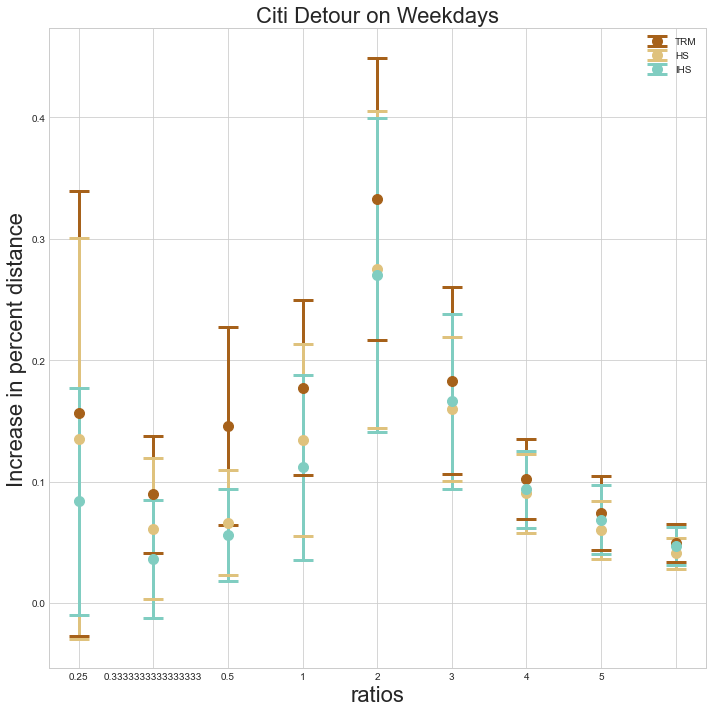

<ipython-input-28-9c139ad5d78b>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


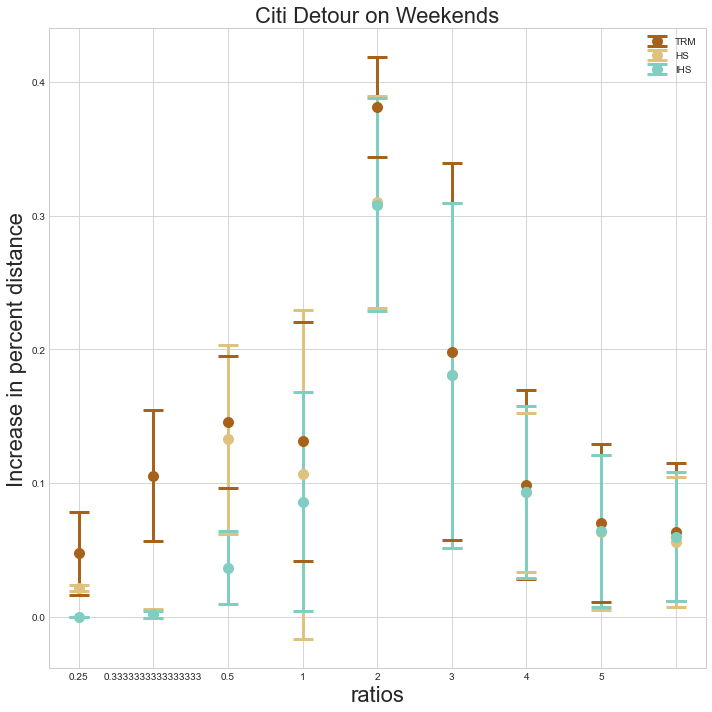

<ipython-input-28-9c139ad5d78b>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


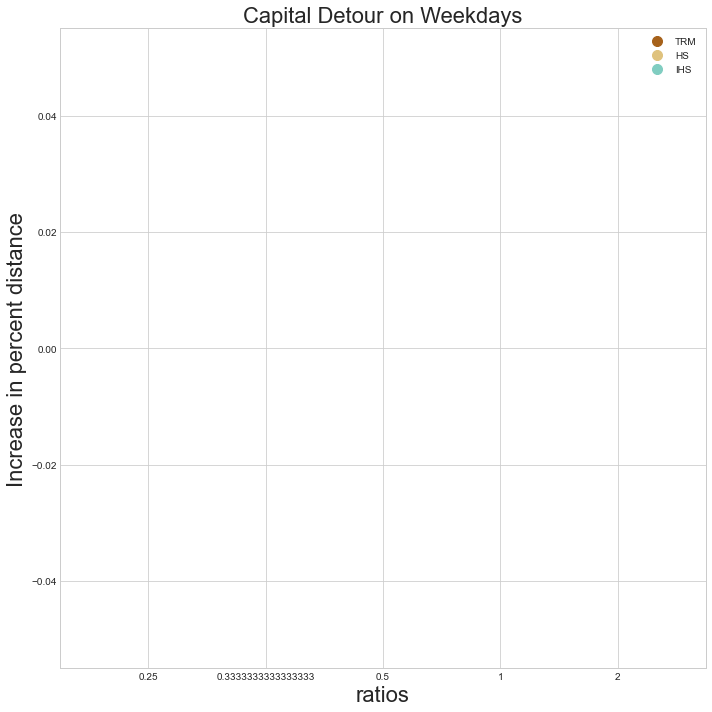

<ipython-input-28-9c139ad5d78b>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


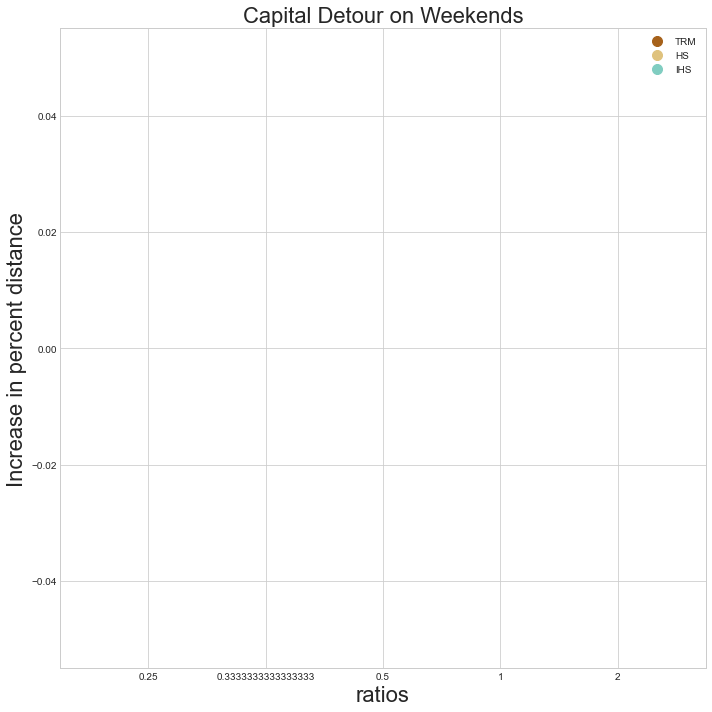

<ipython-input-28-9c139ad5d78b>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


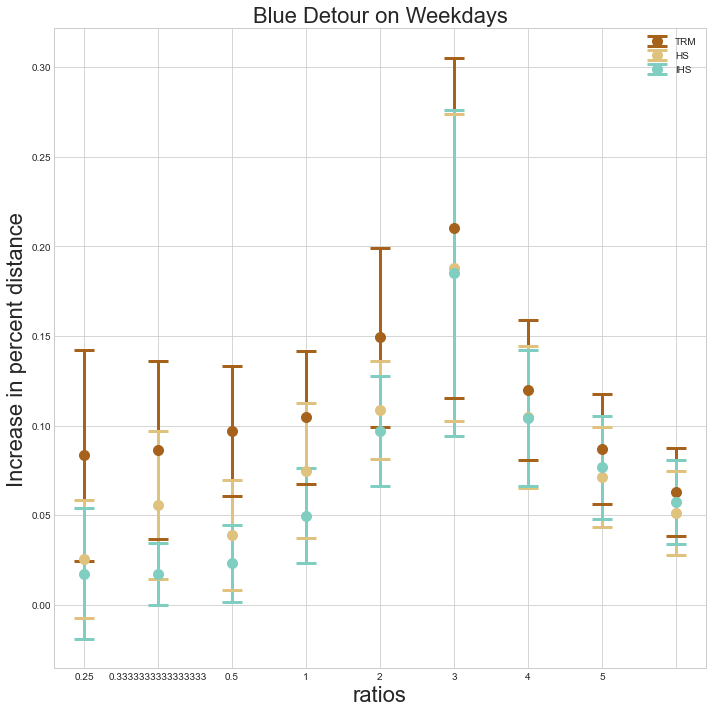

<ipython-input-28-9c139ad5d78b>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


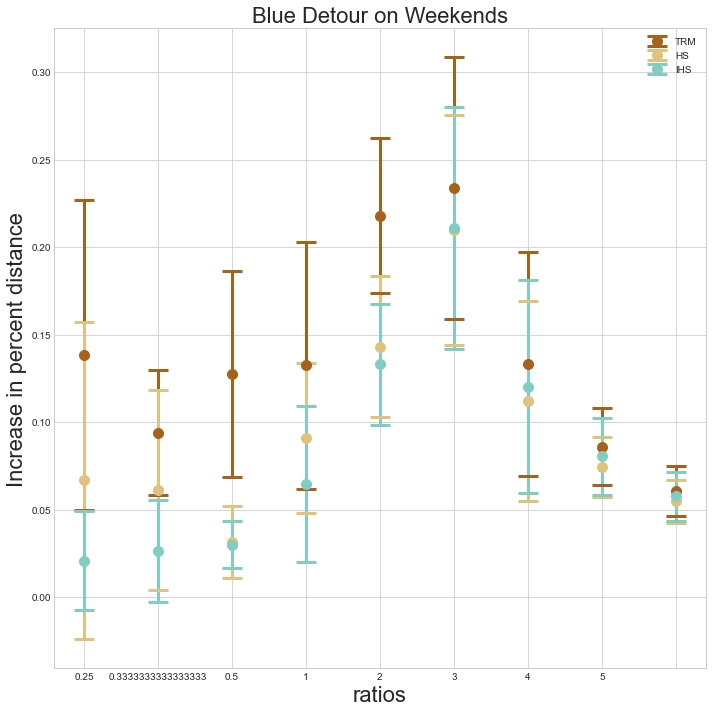

<ipython-input-28-9c139ad5d78b>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


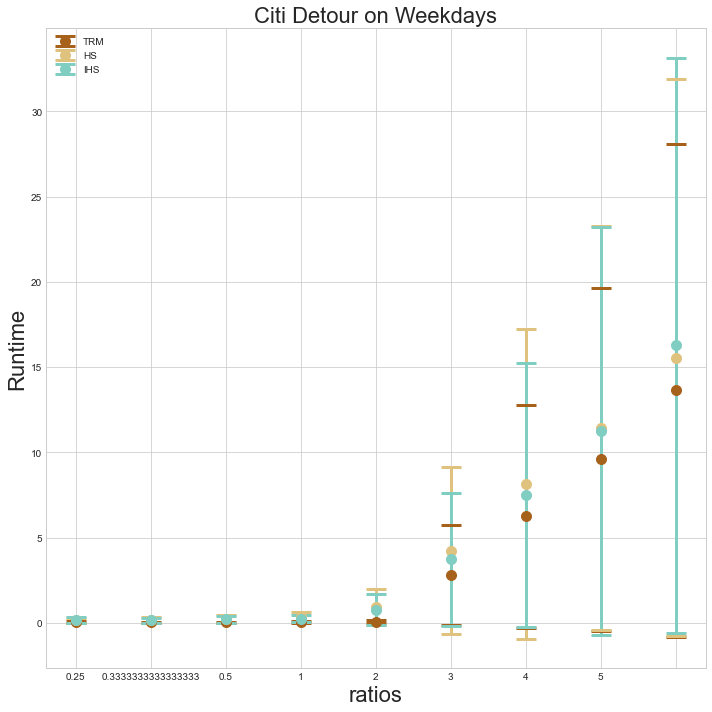

<ipython-input-28-9c139ad5d78b>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


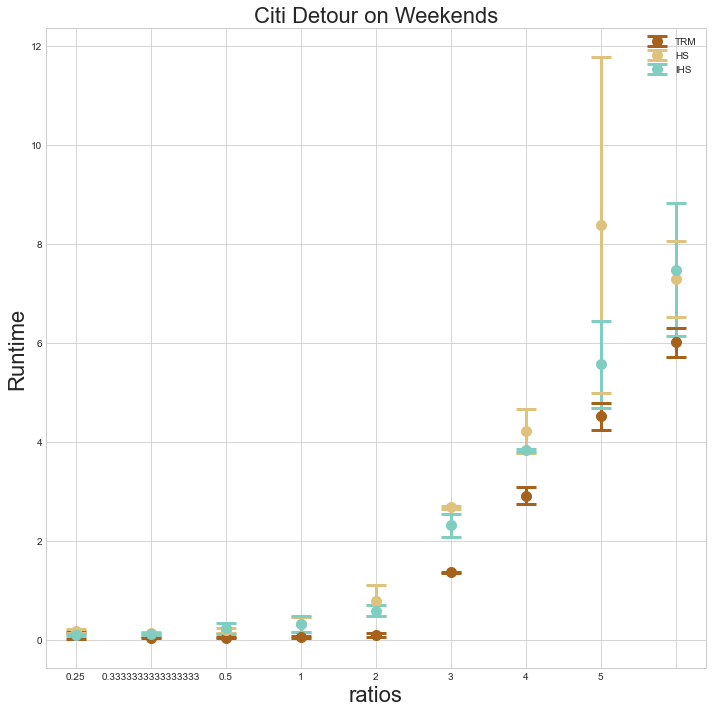

<ipython-input-28-9c139ad5d78b>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


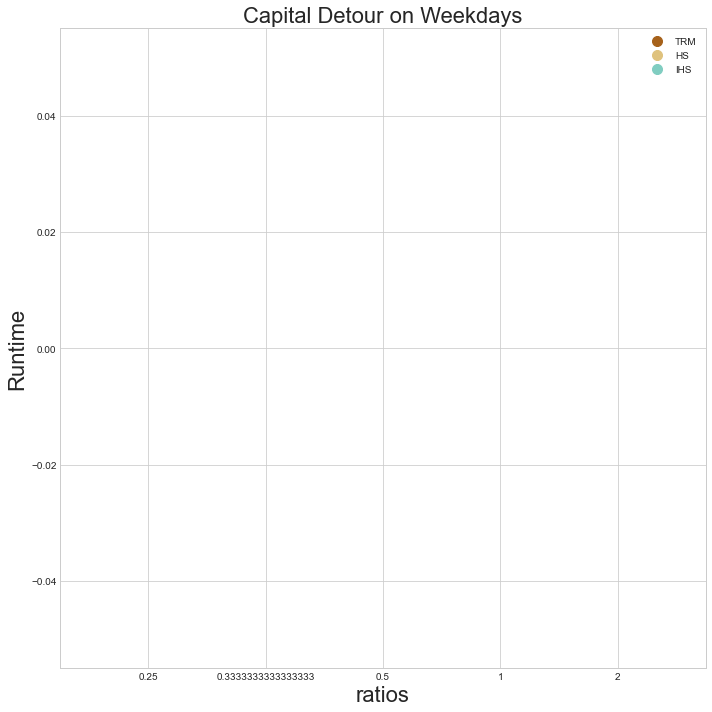

<ipython-input-28-9c139ad5d78b>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


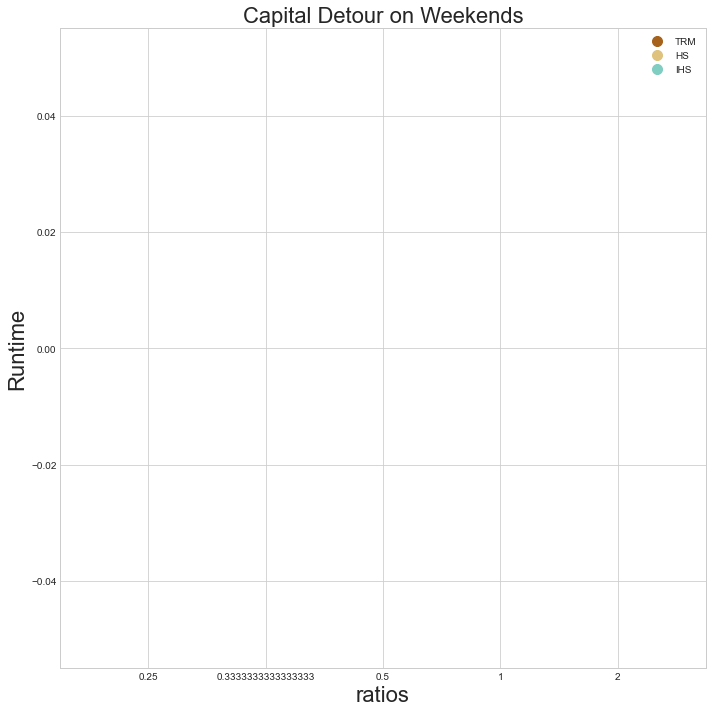

<ipython-input-28-9c139ad5d78b>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


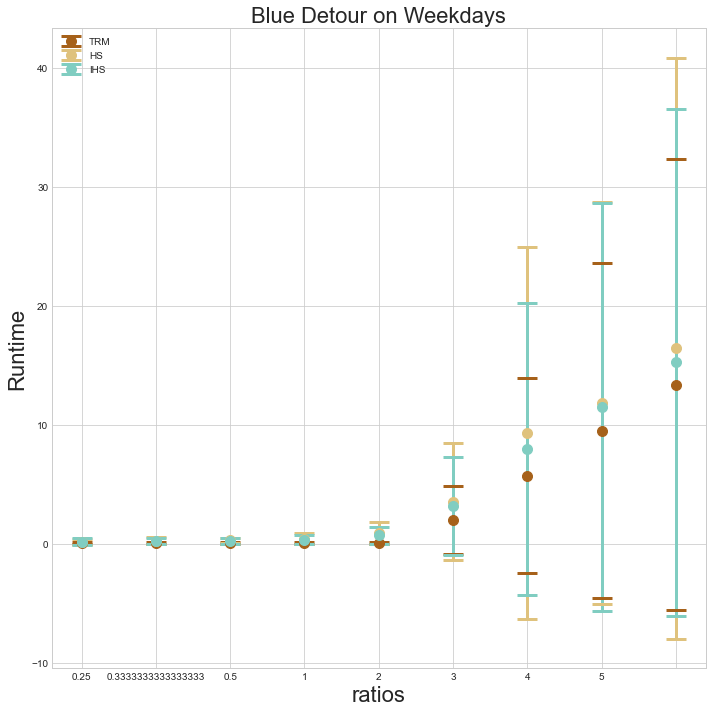

<ipython-input-28-9c139ad5d78b>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratios)


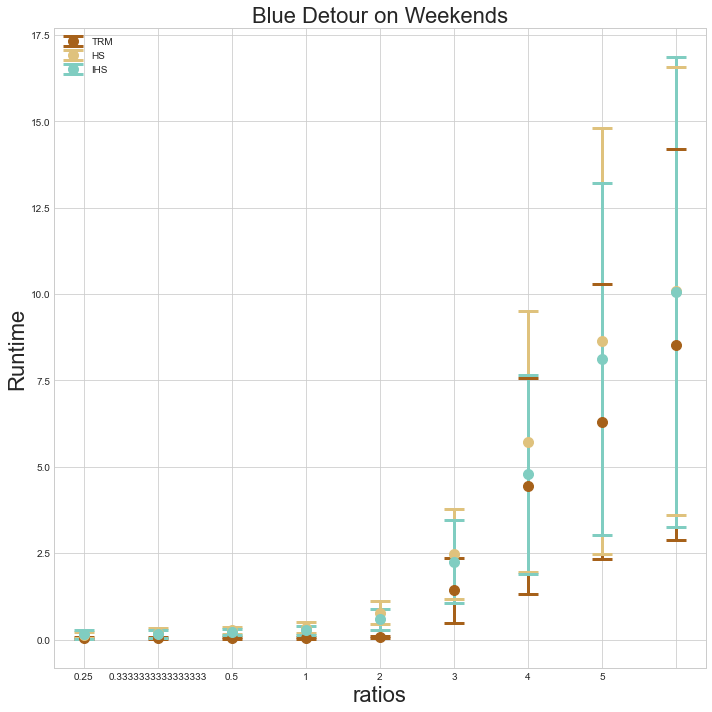

In [28]:
font = {'size'   : 22}
plt.style.use('seaborn-whitegrid')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
colors = ['#a6611a', '#dfc27d', '#80cdc1', '#018571','#FF00FF']
color = 0
for source in sources:
    for day in ['weekday','weekend']:
        plt.style.use('seaborn-whitegrid')
        temp_df, det_cols = get_det_group(source,day)
        group = temp_df.groupby('ratios')
        fig, ax = plt.subplots()
    

        for c in det_cols: 
            ax.errorbar(group.groups.keys(), group[c].mean(), yerr=group[c].std(),label=c.split('_')[0],fmt='o',c=colors[color],ms=10,capsize=10,capthick=3,elinewidth=3)
            color +=1
        color = 0
        plt.title(source.capitalize() +' Detour on '+day.capitalize()+'s',**font)
        plt.legend()
        ax.set_ylabel('Increase in percent distance',**font)
        ax.set_xlabel('ratios',**font)
        ax.set_xticklabels(ratios)
        fig.set_size_inches(10, 10)
        
        fig.tight_layout()
        fig.savefig('figures/'+source+'_'+day+'scores_rats')
        plt.show()
        
for source in sources:
    for day in ['weekday','weekend']:
        plt.style.use('seaborn-whitegrid')
        fig, ax = plt.subplots()
        group = df.loc[(df.source == source) & (df.day==day)].groupby('ratios')
        for c in rt_cols: 
            ax.errorbar(group.groups.keys(), group[c].mean(), yerr=group[c].std(),label=c.split('_')[0],fmt='o',c=colors[color],ms=10,capsize=10,capthick=3,elinewidth=3)
            color +=1
        color = 0
        plt.title(source.capitalize()+' Detour on '+day.capitalize()+'s',**font)
        ax.set_ylabel('Runtime',**font)
        ax.set_xlabel('ratios',**font)
        ax.set_xticklabels(ratios)
        fig.set_size_inches(10, 10)
        fig.tight_layout()
        plt.legend()
        fig.savefig('figures/'+source+'_'+day+'rtrats')
        plt.show()

In [9]:
day='weekday'
latex,det_cols = get_det_group(sources[0],day)
latex = latex.groupby('ratios').mean()
if len(sources)>1:
    for source in sources[1:]:
        latex.append(df.loc[(df.source == source) & (df.day==day),score_cols+['ratios']].groupby('ratios').mean().astype(int))

for source in sources:
    latex.append(df.loc[(df.source == source) & (df.day==day),score_cols+['ratios']].groupby('ratios').mean().astype(int))

In [10]:
print('k')

k


In [11]:
temp_agg = pd.DataFrame()

for source in sources:
    temp_=pd.DataFrame(columns=['TRMciti',  'Local Ratiociti', 'HSciti', 'GHSciti','IHSciti', 'TRMcapital' ,
                            'Local Ratiocapital' ,  'HScapital' ,  'GHScapital' ,  'IHScapital' ,  'TRMblue',
                            'Local Ratioblue' ,  'HSblue' ,  'GHSblue' ,  'IHSblue' ])
    for day in ['weekend','weekday']:
        temp = get_det_group(source,day)[0].groupby('ratios').mean()
        temp.index = [str(i)+' '+day.capitalize() for i in temp.index]
        temp.columns = [c.split('_')[0]+source for c in temp.columns]
        temp_=temp_.append(temp)
    for c in temp.columns:
        temp_agg[c]=np.round(temp_[c].values,2)

temp_agg.index = ([1,.8,.6,.4,.2]+[1,.8,.6,.4,.2])[::-1]
for i in range(len(temp_agg.index)):
    for j in [0,5,10]:
        temp_agg.iloc[i,j+np.argmin(temp_agg.iloc[i,range(j,j+5)].values)] = '\\textbf{'+str(temp_agg.iloc[i,j+np.argmin(temp_agg.iloc[i,range(j,j+5)].values)])+'}'

latex = temp_agg.to_latex()
latex = latex.replace('\\textbackslash textbf\\{','\\textbf{').replace('\\}','}')
print(latex)

ValueError: Length of values (0) does not match length of index (18)

In [ ]:

temp_agg = pd.DataFrame()

for source in sources:
    temp_=pd.DataFrame(columns=['TRMciti',  'Local Ratiociti', 'HSciti', 'GHSciti','IHSciti', 'TRMcapital' ,
                            'Local Ratiocapital' ,  'HScapital' ,  'GHScapital' ,  'IHScapital' ,  'TRMblue',
                            'Local Ratioblue' ,  'HSblue' ,  'GHSblue' ,  'IHSblue' ])
    for day in ['weekend','weekday']:
        temp = df.loc[(df.source == source) & (df.day==day),['ratios']+rt_cols].groupby('ratios').mean()
        temp.index = [str(i)+' '+day.capitalize() for i in temp.index]
        temp.columns = [c.split('_')[0]+source for c in temp.columns]
        temp_=temp_.append(temp)
    for c in temp.columns:
        temp_agg[c]=np.round(temp_[c].values,2)

temp_agg.index = [1,.8,.6,.4,.2]+[1,.8,.6,.4,.2]
print(temp_agg)
for i in range(len(temp_agg.index)):
    for j in [0,5,10]:
        print(temp_agg.iloc[i,range(j,j+5)].values)
        temp_agg.iloc[i,j+np.argmin(temp_agg.iloc[i,range(j,j+5)].values)] = '\\textbf{'+str(temp_agg.iloc[i,j+np.argmin(temp_agg.iloc[i,range(j,j+5)].values)])+'}'

latex = temp_agg.to_latex()
latex = latex.replace('\\textbackslash textbf\\{','\\textbf{').replace('\\}','}')
print(latex)